In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
summary = pd.read_csv("atusdata/atussum_2013/atussum_2013.dat")

In [3]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [5]:
def average_minutes(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return (data.weighted_minutes.sum() / data.weight.sum())

In [6]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

Pertinant Columns
* TUFINLWGT - statistical weight of respondent
* TEAGE - age of respondent
* TESEX - sex of respondent
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

###Gender

In [7]:
male_crit = summary.TESEX == 1
female_crit = summary.TESEX == 2
male = summary[male_crit]
female = summary[female_crit]

###Employment Status

In [8]:
employed = summary.TELFS <= 2
unemployed = summary.TELFS >= 3

###Age groups

In [9]:
children_crit = summary.TEAGE < 18
adults_crit = summary.TEAGE >= 18
adults_18_35 = (summary.TEAGE >= 18) & (summary.TEAGE <= 35)
adults_36_50 = (summary.TEAGE > 35) & (summary.TEAGE <= 50)
adults_51_65 = (summary.TEAGE > 50) & (summary.TEAGE <= 65)
seniors_crit = (summary.TEAGE > 65)

###Number of Children in Household

In [10]:
#children_0_crit = summary.TRCHILDNUM == 0
#children_2_crit = summary.TRCHILDNUM == 2
#children_3more_crit = summary.TRCHILDNUM >= 3

###Employed people in different age groups

In [11]:
employed_children = summary[employed & children_crit]
employed_adults = summary[employed & adults_crit]
employed_adults_18_35 = summary[employed & adults_18_35]
employed_adults_36_50 = summary[employed & adults_36_50]
employed_adults_51_65 = summary[employed & adults_51_65]
employed_seniors = summary[employed & seniors_crit]

###Unemployed people in different age groups

In [12]:
unemployed_children = summary[unemployed & children_crit]
unemployed_adults = summary[unemployed & adults_crit]
unemployed_adults_18_35 = summary[unemployed & adults_18_35]
unemployed_adults_36_50 = summary[unemployed & adults_36_50]
unemployed_adults_51_65 = summary[unemployed & adults_51_65]
unemployed_seniors = summary[unemployed & seniors_crit]

###Employment status by gender

In [13]:
employed_male = summary[employed & male_crit]
unemployed_male = summary[unemployed & male_crit]
employed_female = summary[employed & female_crit]
unemployed_female = summary[unemployed & female_crit]

##Average time spent on relaxation and leisure by different age groups and their employment status.

In [14]:
employed_age_group = [employed_children, employed_adults_18_35, employed_adults_36_50, employed_adults_51_65, employed_seniors]
unemployed_age_group = [unemployed_children, unemployed_adults_18_35, unemployed_adults_36_50, unemployed_adults_51_65, unemployed_seniors]

In [15]:
%%capture
employed_leisure_time_per_day = []
unemployed_leisure_time_per_day = []
for i in range(len(employed_age_group)):
    employed_leisure_time = average_minutes(employed_age_group[i], "1203") / 60
    unemployed_leisure_time = average_minutes(unemployed_age_group[i], "1203") / 60
    employed_leisure_time_per_day.append(employed_leisure_time)
    unemployed_leisure_time_per_day.append(unemployed_leisure_time)

In [16]:
avg_emp_enj = sum(employed_leisure_time_per_day)/len(employed_leisure_time_per_day)
avg_unemp_enj = sum(unemployed_leisure_time_per_day)/len(unemployed_leisure_time_per_day)

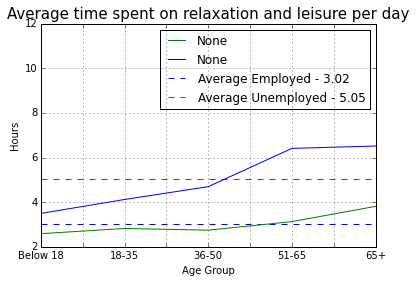

In [17]:
label = ["Below 18", "18-35", "36-50", "51-65", "65+"]
emp_enjoying = pd.Series(employed_leisure_time_per_day, index=label)
unemp_enjoying = pd.Series(unemployed_leisure_time_per_day)
emp_enjoying.plot(color="green", label="Employed")
unemp_enjoying.plot(color="blue", label="Unemployed")
plt.title("Average time spent on relaxation and leisure per day", fontsize=15)
plt.ylabel("Hours")
plt.xlabel("Age Group")
plt.ylim(ymin=2, ymax=12)
plt.hlines(avg_emp_enj, xmin=0, xmax= 4, color='blue', linestyles = "dashed", label = "Average Employed - {:.2f}".format(avg_emp_enj))
plt.hlines(avg_unemp_enj, xmin=0, xmax= 4, color='red', linestyles = "dashed", label = "Average Unemployed - {:.2f}".format(avg_unemp_enj))
plt.legend()
plt.show()

## Average time spent on sleeping by gender and their employment status.

In [18]:
male_group = [employed_male, unemployed_male]
female_group = [employed_female, unemployed_female]

In [19]:
%%capture
male_sleeping = []
female_sleeping = []
for i in range(len(male_group)):
    male_sleeping_time = average_minutes(male_group[i], "010101") / 60
    female_sleeping_time = average_minutes(female_group[i], "010101") / 60
    male_sleeping.append(male_sleeping_time)
    female_sleeping.append(female_sleeping_time)

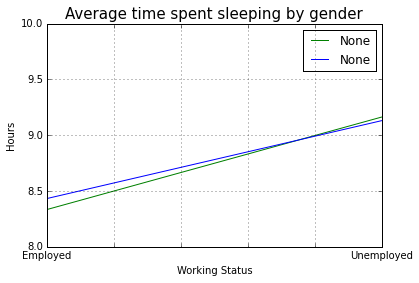

In [20]:
lab = ["Employed", "Unemployed"]
ms = pd.Series(male_sleeping, index=lab)
fs = pd.Series(female_sleeping)
ms.plot(color="green", label="Male")
fs.plot(color="blue", label="Female")
plt.title("Average time spent sleeping by gender", fontsize=15)
plt.ylabel("Hours")
plt.xlabel("Working Status")
plt.ylim(ymin=8, ymax=10)
plt.legend(loc="best")
plt.show()

##Average time spent per day on specific activities by gender.

In [21]:
%%capture
male_laundry = average_minutes(male, "020102")
female_laundry = average_minutes(female, "020102")
male_sports = average_minutes(male, "1301")
female_sports = average_minutes(female, "1301")
male_eat_drink = average_minutes(male, "110101")
female_eat_drink = average_minutes(female, "110101")
male_religious = average_minutes(male, "1401")
female_religious = average_minutes(female, "1401")
male_studying = average_minutes(male, "060101")
female_studying = average_minutes(female, "060101")
male_reading = average_minutes(male, "120312")
female_reading = average_minutes(female, "120312")


In [22]:
men = [male_laundry, male_sports, male_eat_drink, male_religious, male_studying, male_reading]
women = [female_laundry, female_sports, female_eat_drink, female_religious,female_studying, female_reading]

In [23]:
label = ["Doing Laundry", "Sports", "Eating & Drinking", "Religious", "Studying", "Reading"]
men_categories = pd.Series(men, index=label)
women_categories = pd.Series(women, index=label)

In [24]:
men_women_df = pd.DataFrame(men_categories, index=label)
men_women_df.columns = ["Men"]
men_women_df["Women"] = women_categories

In [25]:
men_women_df

,Men,Women
Doing Laundry,3.577602,16.132770
Sports,23.917355,12.148622
Eating & Drinking,68.508580,64.997007
Religious,7.223202,10.002557
Studying,15.567393,14.136000
Reading,15.490346,22.873709


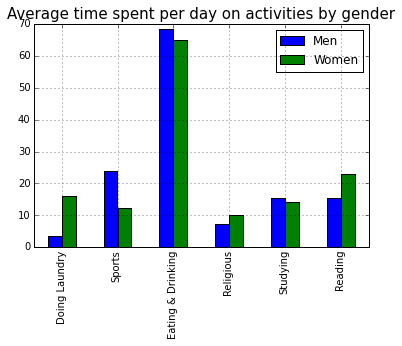

In [26]:
men_women_df.plot(kind="bar")
plt.title("Average time spent per day on activities by gender", fontsize=15)
plt.show()

##Merge data

In [46]:
activities = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")
respondent = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat")

In [47]:
activities.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,04:00:00,12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,12:00:00,12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,12:05:00,14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,14:05:00,19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,19:00:00,19:30:00,11,1,1,110101,1101,0


In [48]:
respondent.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [49]:
data = pd.merge(activities, respondent)

In [50]:
data.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1


In [51]:
data = data[['TUCASEID', 'TRCODE','TESCHENR', 'TESPEMPNOT', 'TRCHILDNUM']]

In [52]:
data

,TUCASEID,TRCODE,TESCHENR,TESPEMPNOT,TRCHILDNUM
0,20130101130004,10101,1,-1,3
1,20130101130004,110101,1,-1,3
2,20130101130004,120303,1,-1,3
3,20130101130004,60301,1,-1,3
4,20130101130004,110101,1,-1,3
5,20130101130004,30201,1,-1,3
6,20130101130004,120303,1,-1,3
7,20130101130004,10201,1,-1,3
8,20130101130004,60301,1,-1,3
9,20130101130004,10101,1,-1,3
